In [32]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [54]:
# Get the path from
import os, datetime

# Combine the path and filename
completepath =  '/Users/finlandcowboy/Desktop/programming/ML/banking/fraud detection in banking.ipynb'

filecreationtime = os.path.getatime(completepath)
filecreationtime = datetime.datetime.utcfromtimestamp(filecreationtime)

now = datetime.datetime.now()
print(f'Notebook: {nb_name}')
print(f'At path: {path[0]}')
print(f'Dev Time: {str(now - filecreationtime)}')

Notebook: fraud detection in banking.ipynb
At path: %cd%
Dev Time: 3:00:20.310587


# Fraud Detection in Finance and Banking

__Dataset__ - *https://www.kaggle.com/mlg-ulb/creditcardfraud* \
__Helpful links__ - *https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e*

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

# Exploratory Data Analysis

__Getting familiar with data__

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset is protecting user's data so to the original data was implemented PCA algorithm to protect user identeties and sensetive features \
In this case we can't really understand which feature stands for name, time, etc \
So we can work with this dataset as we would work with matrix

In [5]:
data.Class.value_counts(normalize=True), data.Class.value_counts(normalize=False)

(0    0.998273
 1    0.001727
 Name: Class, dtype: float64,
 0    284315
 1       492
 Name: Class, dtype: int64)

In [6]:
data[data.Class == 1].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


#### Corr heatmap

Let's check if we can get something from correlation matrix, because in my opinion this is one of the best graphs to understand the target class affection by other features

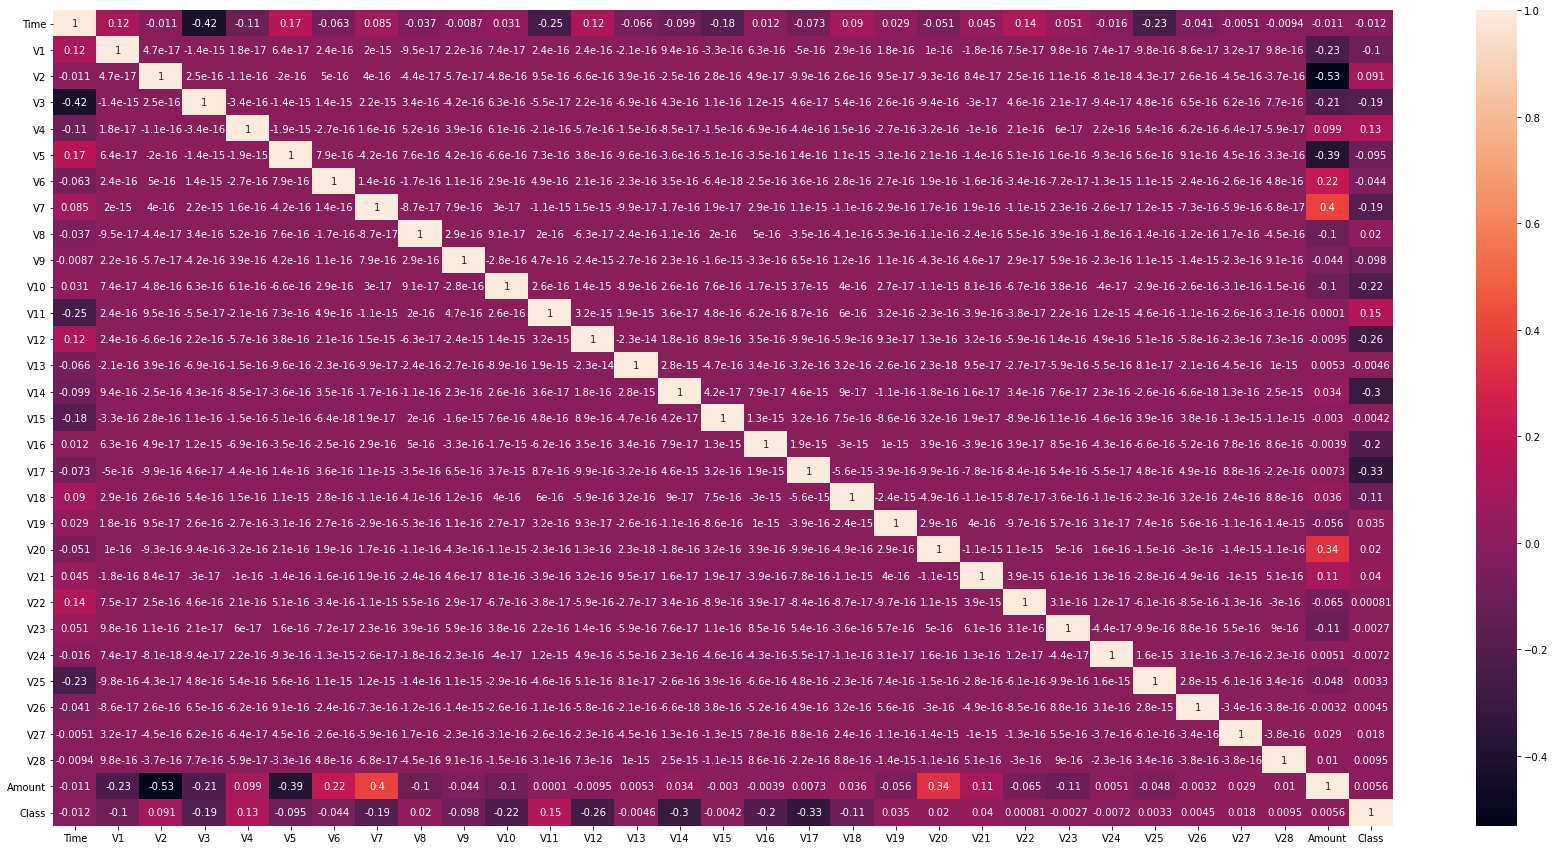

In [7]:
plt.figure(figsize=(30,15))
corr = data.corr()
sns.heatmap(corr, annot=True);

##### Meaningful variables

__V12__ - Corr = -0.26
__V17__ - Corr = -0.33
__V14__ - Corr = -0.3

## Hypotesis 1
##### *Let's check if negatvie correlation may affect the fraudulent transaction*

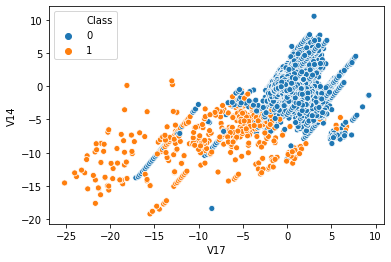

In [8]:
sns.scatterplot(hue=data.Class, x=data['V17'], y= data['V14'])

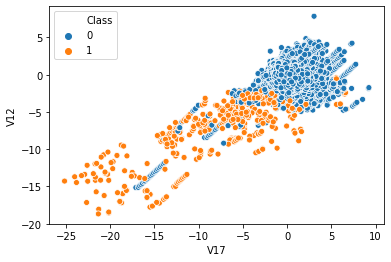

In [9]:
sns.scatterplot(hue=data.Class, x=data['V17'], y= data['V12'])

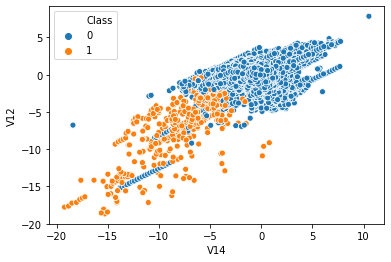

In [10]:
sns.scatterplot(hue=data.Class, x=data['V14'], y= data['V12'])

As we can notice, all three plot are kind of the same\
We can barely split the data by drawing a line between orange and blue dotes\\

But let's check would be data visualized if you'd use one of the features in which correlation with our target feature ('Class') would be barely zero. For example: V13

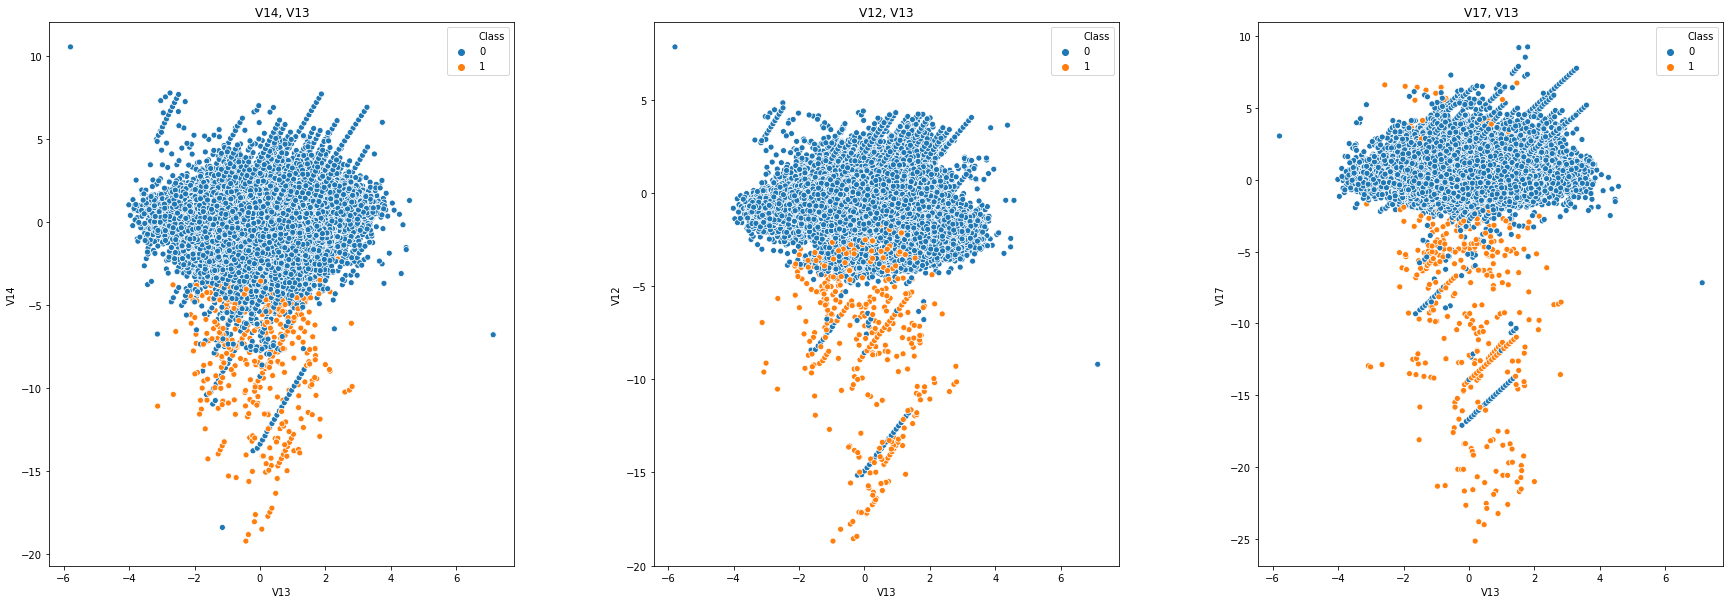

In [11]:
fig = plt.figure(figsize=(30,10))
rows = 1
cols = 3 
for i, feature in enumerate(['V14','V12','V17']):
    ax = fig.add_subplot(rows,cols,i+1)
    plt.title(f'{feature}, V13')
    sns.scatterplot(hue=data.Class, y=data[feature], x=data['V13'])
plt.subplots_adjust(wspace=0.3, hspace=0.2)

As we can see, the data is could be splited in 2 original classes by drawing a horizontal line near -5\
Also by x-axis all the examples is distributed between -4 and 4\
Let's check if we can get a high accuracy using hypothesis about just this parameters

In [12]:
hypothesis_1_v14 = [0 if i > -4 and i < 4 else 1 for i in data.V14]
hypothesis_1_v12 = [0 if i > -4 and i < 4 else 1 for i in data.V12]
hypothesis_1_v17 = [0 if i > -4 and i < 4 else 1 for i in data.V17]

In [13]:
y = data.Class
accuracy_score(hypothesis_1_v12, y), accuracy_score(hypothesis_1_v14, y), accuracy_score(hypothesis_1_v17, y)

(0.9985007390970025, 0.9969944558946936, 0.9981390906824622)

__So the results is quiet good, right?__\
\
But let's check some other metrics like confusion matrix, to check F1-Score, Precision and Recall. \
If this metrics would be ok, we can claim this classifier as an answer

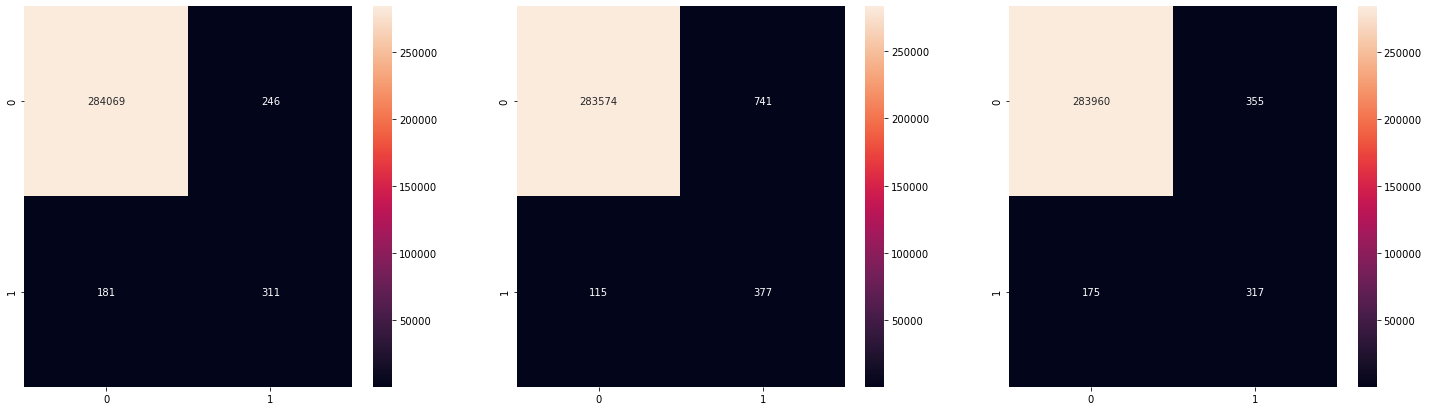

In [14]:
conf_mat_v12 = confusion_matrix(y, hypothesis_1_v12)
conf_mat_v14 = confusion_matrix(y, hypothesis_1_v14)
conf_mat_v17 = confusion_matrix(y, hypothesis_1_v17)
conf_mat = [conf_mat_v12, conf_mat_v14, conf_mat_v17]
rows = 1 
cols = 3
fig = plt.figure(figsize=(25, 7))
for i, matrix in enumerate(conf_mat):
    ax = fig.add_subplot(rows,cols,i+1)
    sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, fmt='d')

Let's compute Precise, Recall and F1-Score for these three features

In [15]:
TN, FP, FN, TP = conf_mat_v12[0][0], conf_mat_v12[0][1], conf_mat_v12[1][0], conf_mat_v12[1][1]
from sklearn.metrics import f1_score
#Recall, Precision, F1-Score
TP/(TP+FN), TP/(TP+FP), f1_score(y, hypothesis_1_v12)

(0.6321138211382114, 0.5583482944344704, 0.5929456625357483)

In [16]:
TN, FP, FN, TP = conf_mat_v17[0][0], conf_mat_v17[0][1], conf_mat_v17[1][0], conf_mat_v17[1][1]
from sklearn.metrics import f1_score
#Recall, Precision, F1-Score
TP/(TP+FN), TP/(TP+FP), f1_score(y, hypothesis_1_v17)

(0.6443089430894309, 0.47172619047619047, 0.5446735395189004)

In [17]:
TN, FP, FN, TP = conf_mat_v14[0][0], conf_mat_v14[0][1], conf_mat_v14[1][0], conf_mat_v14[1][1]
from sklearn.metrics import f1_score
#Recall, Precision, F1-Score
TP/(TP+FN), TP/(TP+FP), f1_score(y, hypothesis_1_v14)

(0.766260162601626, 0.3372093023255814, 0.4683229813664596)

__The results is pretty bad, yeah?__

\
As we saw earlier, the percentage of fraud transaction is about 0.172%, so even if we would predict that every transaction is a non-fraud transaction, we would get an accuracy 99.8 %. \
So these hypothesis is not good enough to claim it as a result

Let's take a look at feature V14, since it got the best recall, and see if we can improve recall metric

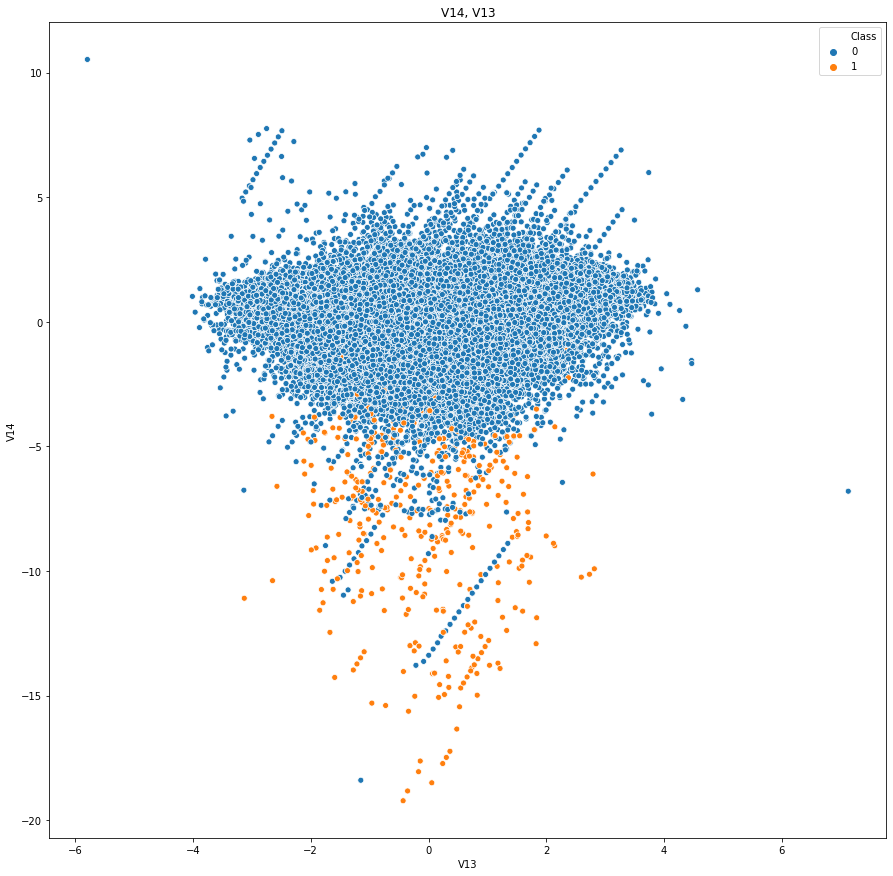

In [18]:
plt.figure(figsize=(15,15))
plt.title('V14, V13')
sns.scatterplot(hue=data.Class, y=data['V14'], x=data['V13']);

Let's take a look closer at x-axis of fraud transactions

In [19]:
data[data.Class == 1].V14.describe()

count    492.000000
mean      -6.971723
std        4.278940
min      -19.214325
25%       -9.692723
50%       -6.729720
75%       -4.282821
max        3.442422
Name: V14, dtype: float64

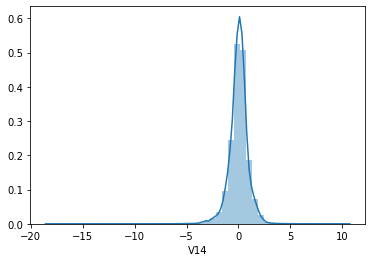

In [20]:
sns.distplot(data[data.Class == 0].V14)

__Let's try some KDE graphs (KDE - Kernel density estimation)__ \
You can check it here - *https://en.wikipedia.org/wiki/Kernel_density_estimation* 

Simply this is nonparametric method for using a dataset to estimating probabilities for new points. \
This could give as some new information about out target class

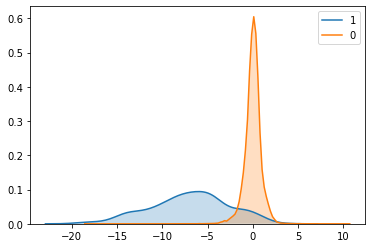

In [21]:
sns.kdeplot(data=data[data.Class == 1].V14, shade=True, label='1')
sns.kdeplot(data=data[data.Class == 0].V14, shade=True, label='0') ;

__Looks cool, huh?__
\
As we can see, normal transaction takes a shape of normal distribution, however fraud transactions are actually distributed normally too but highly spread \
So if we define the value, from which the class 1 and 0 are equal, we can use it as a threshold for our classifier

In [22]:
data.V14.describe()

count    2.848070e+05
mean     1.479045e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

In [23]:
%%time
x_ax = np.arange(-5, 0, .1)
y_ax = np.arange(0, 5, .1)
rec = []
acc = []
for i in x_ax:
    for j in y_ax:
        hypo = [0 if z > i and z < j else 1 for z in data.V14]
        acc.append(accuracy_score(hypo, y))
        conf_m = confusion_matrix(y, hypo)
        rec.append(conf_m[1][1] / (conf_m[1][1] + conf_m[1][0]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/finlandcowboy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/execution.py", line 1315, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "/Users/finlandcowboy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/finlandcowboy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 306, in confusion_matrix
    y_pred = np.array([label_to_ind.get(x, n_labels + 1) for x in y_pred])
  File "/Users/finlandcowboy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 306, in <listcomp>
    y_pred = np.array([label_to_ind.get(x, n_labels + 1) for x in y_pred])
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/finlandcowboy/opt/anaconda3/lib/python3.8/site-packages/IPython/

TypeError: object of type 'NoneType' has no len()

# Hypothesis 2

Okay, we know that there's huge difference in target class data if we are using soe of the previous meaningful features. What if we can choose some positive correlated features and check if we can get something out if it

__Meaningful variables__  - V4, V11 

In [ ]:
sns.scatterplot(x=data.V4, y=data.V11, hue=data.Class)

In [ ]:
sns.scatterplot(x=data.V4, y=data.V13, hue=data.Class)

In [ ]:
y_pred = [1 if i > 5 else 0 for i in data.V4]

In [ ]:
accuracy_score(y,y_pred=y_pred)

Wow that's look much better, now let's check other metrics

In [ ]:
hypothesis_2_v4 = y_pred

In [ ]:
conf_mat_v4 = confusion_matrix(y, hypothesis_2_v4)

TN, FP, FN, TP = conf_mat_v4[0][0], conf_mat_v4[0][1], conf_mat_v4[1][0], conf_mat_v4[1][1]
from sklearn.metrics import f1_score
#Recall, Precision, F1-Score
TP/(TP+FN), TP/(TP+FP), f1_score(y, hypothesis_2_v4)

Actually kind of sad results \
Let's try with V11

In [ ]:
sns.scatterplot(x=data.V11, y=data.V13, hue=data.Class)

In [ ]:
hypothesis_2_v11 = [1 if i > 2.5 else 0 for i in data.V11]

In [ ]:
conf_mat_v11 = confusion_matrix(y, hypothesis_2_v11)

TN, FP, FN, TP = conf_mat_v11[0][0], conf_mat_v11[0][1], conf_mat_v11[1][0], conf_mat_v11[1][1]
from sklearn.metrics import f1_score
#Recall, Precision, F1-Score
TP/(TP+FN), TP/(TP+FP), f1_score(y, hypothesis_2_v11)

Let's return to hypothesis 1, because i  think we can improve recall metric \

So, let's try to guess what thresholds we should choose, to get a better recall \
Actually we should decrease a number of FN results to get a better recall \
Again let's take a look at feature V14

In [ ]:
sns.scatterplot(hue=data.Class, x=data['V14'], y= data['V13']);

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score

In [ ]:
def recall(v):
    conf_mat = confusion_matrix(y, v)
    TN, FP, FN, TP = conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1]
    return TP/(TP+FN)

In [ ]:
one = np.arange(2, 5, 0.1)
two = np.arange(-2, 0, 0.1)

In [ ]:
hypo_4 = []
for o in one:
    for t in two:
        h = [0 if i > t and i < o else 1 for i in data['V14']]
        hypo_4.append([o, t ,accuracy_score(y, h), recall(h), precision_score(y, h)])
hypo_4_df = pd.DataFrame(hypo_4)

In [ ]:
hypo_4_df.columns = ['high', 'low', 'acc', 'recall', 'precision']

In [ ]:
hypo_4_df['sum'] = hypo_4_df.acc + hypo_4_df.recall

In [ ]:
hypo_4_df.sort_values(by='sum', ascending=False).iloc[0]

__From this DataFrame we see that high threshold = 3 and lower = -1.8 gives us the highest sum of accuracy score and recall so we can use this as a classifier__

# Hypothesis 3 (RandomForest) 

In [55]:
params = {
    'max_depth' : np.arange(1,8,1),
    'n_estimators' : np.arange(50,150,5),
    'max_features' : ['auto', 'sqrt', 'log2']
}


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=7)


y = data.Class
x = data.drop(columns=['Class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=7)

In [58]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5)

In [ ]:
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.fit(x_train, y_train)
y_pred = CV_rfc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score
print('F1 score:',f1_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

Since our last best result was __Recall - 0.873, Accuracy - 0.968__ \
We got a better accuracy, but lower recall

# Hypothesis 4 (Logit) 

Adding polynomial features that we chosen as meaningful in hypothesis 1 

In [ ]:
features = ['V14', 'V12', 'V17']
data_log_reg = data[features]

In [ ]:
for col1 in data_log_reg:
    for col2 in data_log_reg:
        data_log_reg[f'{col1}_{col2}'] = data_log_reg[col1] * data_log_reg[col2]

In [ ]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(data_log_reg, y, test_size=0.4, random_state=7)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_log,y_train_log)
y_pred_log_reg = log_reg.predict(x_test_log)
print(classification_report(y_test_log, y_pred_log_reg))

In [ ]:
mean_absolute_error(y_test_log, y_pred_log_reg)

In [ ]:
accuracy_score(y_test_log, y_pred_log_reg)

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(log_reg, threshold=-np.inf, max_features=8)
sfm.fit(x_train_log, y_train_log)
f_idx = sfm.get_support()
new_features = data_log_reg.columns[f_idx]

In [ ]:
x_train_log_2, x_test_log_2, y_train_log_2, y_test_log_2, = train_test_split(data_log_reg[new_features], y)

In [ ]:
log_reg_2 = LogisticRegression()
log_reg_2.fit(x_train_log_2, y_train_log_2)
y_log_2 = log_reg_2.predict(x_test_log_2)
print(classification_report(y_log_2, y_test_log_2))

In [ ]:
accuracy_score(y_log_2, y_test_log_2)

# Hypthosesis 5 (SVM)

In [ ]:
from sklearn.svm import SVC
params_svc =  {
    'kernel' : ('linear', 'rbf'),
    'C' : [1,10]
}
svc = SVC()

CV_svc = GridSearchCV(estimator=svc, param_gird=params_svc, cv=5)

In [ ]:
CV_svc.best_params_

In [ ]:
CV_svc.fit(x_train, y_train)
CV_svc_pred = CV_svc.predict(x_test)
print(classification_report(y_test,CV_svc_pred))
print(f'Accuracy score: {accuracy_score(y_test,CV_svc_pred)}\nRecall: {recall_score(y_test,CV_svc_pred)}\
Precision: {precision_score(y_test, CV_svc_pred)}')

In [ ]:
svm.fit(x_train, y_train)
svm_pred = SVC.predict(x_test)
print(classification_report(y_test, svm_pred))

In [ ]:
accuracy_score(y_test,svm_pred)

In [ ]:
confusion_matrix(y_test, svm_pred)

# Conclusion

Since we got a dataset that could be easily overfitted by a model I'd care more about recall metric than an accuracy, because we can easily take a linear regression as an algorithm and increase R^2 to get an overfitted model but it wouldn't work great on the other data. Our first hypothesis is quiet good, but here we have the same problem as with linear regression. It works good, on this kind of data, but if we expand our dataset a little bit, we might have some problems, just because it's not an algorithm in which we can feed the data and then "fit, predict", it's just a thresholds that we good from enumeration of values. 